# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['exam1','exam2','admitted']
exp3 = pd.read_csv('C:\\Users\\tanushree\\Documents\\ml exps\\studentData.txt', names=column_names)
exp3.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
x = exp3[['exam1','exam2']]
y = exp3['admitted']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [5]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [6]:
y_pred = model.predict(x)

In [7]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.92      0.90      0.91        60

    accuracy                           0.89       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [8]:
print(confusion_matrix(y_test, model.predict(x_test)))

[[ 8  1]
 [ 3 13]]


In [9]:
accuracy = accuracy_score(y_test, model.predict(x_test))
print("Accuracy:", accuracy)

Accuracy: 0.84


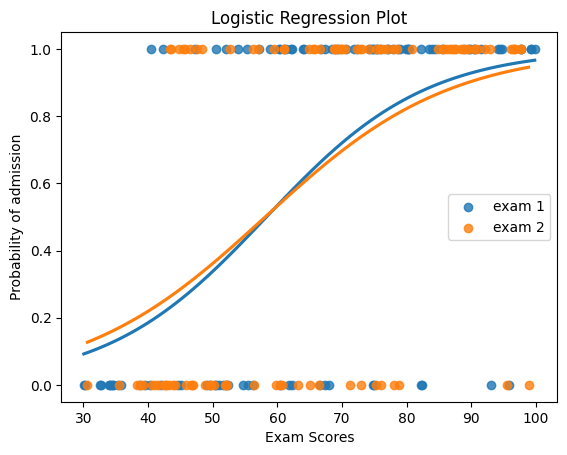

In [10]:
sns.regplot(x=x['exam1'], y=y, logistic=True, ci=None, label='exam 1')
sns.regplot(x=x['exam2'], y=y, logistic=True, ci=None, label='exam 2')

plt.title('Logistic Regression Plot')
plt.xlabel('Exam Scores')
plt.ylabel('Probability of admission')
plt.legend()
plt.show()

In [15]:
exp3['averagescore'] = exp3[['exam1' ,'exam2']].mean(axis=1)
exp3.head()

,exam1,exam2,admitted,averagescore
0,34.623660,78.024693,0,56.324176
1,30.286711,43.894998,0,37.090854
2,35.847409,72.902198,0,54.374803
3,60.182599,86.308552,1,73.245576
4,79.032736,75.344376,1,77.188556


<Axes: xlabel='averagescore', ylabel='admitted'>

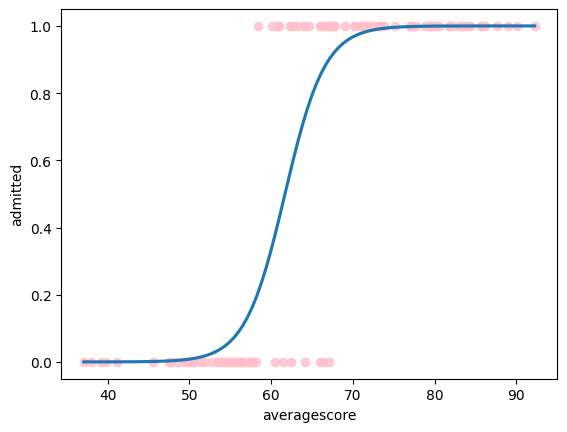

In [17]:

sns.regplot(x=exp3['averagescore'], y=y, logistic=True, ci=None, scatter_kws={'color':'pink'})

In [24]:
def generate_random_data():
    exam1_score = np.random.uniform(0, 100)
    exam2_score = np.random.uniform(0, 100)
    return exam1_score, exam2_score

random_exam1, random_exam2 = generate_random_data()

# Reshape the input data into a 2D array
input_data = np.array([[random_exam1, random_exam2]])

prediction = model.predict(input_data)

print(f'Generated Exam1 Score: {random_exam1:.2f}')
print(f'Generated Exam2 Score: {random_exam2:.2f}')
print(f'Predicted Admission (1: Yes, 0: No): {prediction[0]}')


Generated Exam1 Score: 88.19
Generated Exam2 Score: 35.69
Predicted Admission (1: Yes, 0: No): 1


c:\Users\tanushree\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
